<a href="https://colab.research.google.com/github/RodrigoGuedesDP/IA/blob/main/IA_Fundamentals/Practica_3_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Genetic Algorithms

#TSP problem

Plotting

In [ ]:
def plot_tsp(nodes, route):
    """
    Plot the TSP nodes and route.

    Parameters:
    - nodes: List of tuples containing the coordinates of each node.
    - route: List of node indices representing the TSP route.
    """
    x = [node[0] for node in nodes]
    y = [node[1] for node in nodes]

    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='blue', zorder=2)  # Plot nodes

    for i in range(len(route) - 1):
        node1 = route[i]
        node2 = route[i + 1]
        plt.plot([nodes[node1][0], nodes[node2][0]], [nodes[node1][1], nodes[node2][1]], color='red', zorder=1)  # Plot route

    # Connect the last node to the first node to form a loop
    node1 = route[-1]
    node2 = route[0]

    plt.plot([nodes[node1][0], nodes[node2][0]], [nodes[node1][1], nodes[node2][1]], color='red', zorder=1)  # Plot route

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('TSP Nodes and Route')
    plt.grid(True)
    plt.show()


Calculate fitness

In [ ]:
def fitness(solution): # depende del problema
    distance = 0
    for i in range(len(solution)-1):
        distance += distances[solution[i]][solution[i+1]]

    return distance


#Population initialization

Random

In [ ]:
# Create initial population
def random_initialization(pop_size, num_cities):
    population = []
    for _ in range(pop_size):
        individual = list(np.random.permutation(num_cities)) # create a random solution
        population.append(individual)

    return population


#population = random_initialization(pop_size, N)
#print(population, "\n\n")
#plot_tsp(cities, population[0])
#print(fitness(population[0]))
#plot_tsp(cities, population[2])
#print(fitness(population[2]))
#plot_tsp(cities, population[4])

#Selection

Roulette Wheel

In [ ]:
def roulette_wheel_selection(population, all_fitness):
    max_fitness = max(all_fitness)
    inverted_fitness = [max_fitness - i for i in all_fitness]  # invert fitness

    total_fitness = sum(inverted_fitness)
    selection_probs = [i/total_fitness for i in inverted_fitness]

    return population[np.random.choice(len(population), p=selection_probs)]


Rank-based

In [ ]:
def rank_based_selection(population, all_fitness):
    ordered_fitness = sorted(all_fitness)
    ranked_fitness = [ordered_fitness.index(i) + 1 for i in ordered_fitness]

    total_fitness = sum(ranked_fitness)
    selection_probs = [i/total_fitness for i in ranked_fitness]

    return population[np.random.choice(len(population), p=selection_probs)]


Fitness Scaling

In [ ]:
def fitness_scaling_selection(population, all_fitness):
    min_scale = 50
    max_scale = 100

    min_value = min(all_fitness)
    max_value = max(all_fitness)

    a = (max_scale-min_scale)/(max_value-min_value)
    b = min_scale - a*min_value

    scaled_fitness = [a*i + b for i in all_fitness]

    total_fitness = sum(scaled_fitness)
    selection_probs = [i/total_fitness for i in scaled_fitness]

    return population[np.random.choice(len(population), p=selection_probs)]


Tournament

In [ ]:
def tournament_selection(population, all_fitness):
    while True:
        samples_quantity = np.random.choice(pop_size)
        if samples_quantity > 0:
            break

    selected_fitness = np.random.choice(all_fitness, size=samples_quantity, replace=False)
    min_fitness = min(selected_fitness)
    min_index   = all_fitness.index(min_fitness)

    return population[min_index]


#Crossover

Single point crossover

In [ ]:
def single_point_crossover(parent1, parent2):
    """
    Parameters:
    parent1 (list): The first parent.
    parent2 (list): The second parent.

    Returns:
    offspring1, offspring2: Two offspring produced by the crossover.
    """
    # Choose a crossover point
    crossover_point = random.randint(1, len(parent1) - 1)

    # Create offspring by combining parts of the parents
    offspring1 = parent1[:crossover_point] + parent2[crossover_point:]
    offspring2 = parent2[:crossover_point] + parent1[crossover_point:]

    return offspring1, offspring2


#offspring1, offspring2 = single_point_crossover(population[0], population[1])
#print("Parents:", population[0], population[1])
#print("Offspring:", offspring1, offspring2)

Ordered crossover

In [ ]:
def fill_child(child, parent, end):
    size = len(parent)
    current_pos = (end + 1) % size
    for gene in parent:
        if gene not in child:
            child[current_pos] = gene
            current_pos = (current_pos + 1) % size

def ordered_crossover(parent1, parent2):
    size = len(parent1)
    child1, child2 = [-1]*size, [-1]*size # crea los hijos llenos de -1 al principio

    start, end = sorted(random.sample(range(size), 2))
    child1[start:end+1] = parent2[start:end+1]
    child2[start:end+1] = parent1[start:end+1]

    fill_child(child1, parent1, end)
    fill_child(child2, parent2, end)

    return child1, child2


#offspring1, offspring2 = ordered_crossover(population[0], population[1])
#print("Parents:", population[0], population[1])
#print("Offspring:", offspring1, offspring2)

#Mutation

Swap mutation

In [ ]:
def swap_mutate(individual):
    i, j = np.random.choice(len(individual), 2, replace=False) # two random indices
    new_individual = individual.copy()
    new_individual[i], new_individual[j] = individual[j], individual[i]

    return new_individual


#mutated = swap_mutate(population[0])
#print("Original: \t", population[0])
#print("Mutated: \t", mutated)

#Selection elite

We will select some of the previous generation

In [ ]:
def select_elite(population, all_fitness, elite_size):   # selecciona los que tengan el menor fitness
    elite_indices = np.argsort(all_fitness)[:elite_size]

    return np.array(population)[elite_indices], elite_indices


#all_fitness = [fitness(sol) for sol in population]
#selected_elite, indices = select_elite(population, all_fitness, 2)

#print("Population:", population)
#print("Fitness:", all_fitness)
#print("Selected Elite:", selected_elite)
#print("Selected indices:", indices)

# para imprimir con mejor vista
#data = {'Population': population, 'Fitness': all_fitness}
#df = pd.DataFrame(data)
#print(df)


#Integration

In [ ]:
# Genetic Algorithm Process
def genetic_algorithm(distance_matrix, mutation_rate, generations, selection_type):
    num_cities = distance_matrix.shape[0]
    population = random_initialization(pop_size, N) # population size and num cities
    all_fitness = [fitness(solution) for solution in population]

    for generation in range(generations):
        new_population = []

        # Preserve elite individuals
        selected_elite, elite_indices = select_elite(population, all_fitness, elite_size)
        new_population.extend(selected_elite)

        # Create new population through crossover and mutation
        while len(new_population) < pop_size:
            if selection_type == 'Roulette Wheel':
                parent1 = roulette_wheel_selection(population, all_fitness)
                parent2 = roulette_wheel_selection(population, all_fitness)
            elif selection_type == 'Rank-based':
                parent1 = rank_based_selection(population, all_fitness)
                parent2 = rank_based_selection(population, all_fitness)
            elif selection_type == 'Fitness Scaling':
                parent1 = fitness_scaling_selection(population, all_fitness)
                parent2 = fitness_scaling_selection(population, all_fitness)
            elif selection_type == 'Tournament':
                parent1 = tournament_selection(population, all_fitness)
                parent2 = tournament_selection(population, all_fitness)

            child1, child2 = ordered_crossover(parent1, parent2)

            if random.random() < mutation_rate:
                child1 = swap_mutate(child1)
            if random.random() < mutation_rate:
                child2 = swap_mutate(child2)

            new_population.extend([child1, child2])

        population = new_population[:pop_size] # replace with new population
        all_fitness = [fitness(sol) for sol in population]

        if generation % 50 == 0:
            #print(f"Generation {generation} | Best distance: {min(all_fitness)}")

            if selection_type == 'Roulette Wheel':
                roulette_wheel_history.append([generation, min(all_fitness)])
            elif selection_type == 'Rank-based':
                rank_based_history.append([generation, min(all_fitness)])
            elif selection_type == 'Fitness Scaling':
                fitness_scaling_history.append([generation, min(all_fitness)])
            elif selection_type == 'Tournament':
                tournament_history.append([generation, min(all_fitness)])

    best_route_index = np.argmin(all_fitness)
    best_route = population[best_route_index]
    best_distance = all_fitness[best_route_index]

    print(f"Final best distance: {best_distance}")

    return best_route, best_distance


#Main

Libraries

In [ ]:
import random
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.spatial.distance import pdist, squareform


Hyperparameters


In [ ]:
#Definition of hyperparameters
N = 100               # Number of cities
pop_size = 100        # Number of solutions
elite_size = 10
mutation_rate = 0.01
generations = 3000
cities = np.random.rand(N, 2)
distances = squareform(pdist(cities, 'euclidean'))

roulette_wheel_history = []
rank_based_history = []
fitness_scaling_history = []
tournament_history = []


Core

In [ ]:
best_route, best_distance = genetic_algorithm(distances, mutation_rate, generations, 'Roulette Wheel')
best_route, best_distance = genetic_algorithm(distances, mutation_rate, generations, 'Rank-based')
best_route, best_distance = genetic_algorithm(distances, mutation_rate, generations, 'Fitness Scaling')
best_route, best_distance = genetic_algorithm(distances, mutation_rate, generations, 'Tournament')

#plot_tsp(cities, best_route)


Final best distance: 11.204031416568165
Final best distance: 34.12308476760899
Final best distance: 21.373821858925528
Final best distance: 11.428872037592363


#Plotting Selection

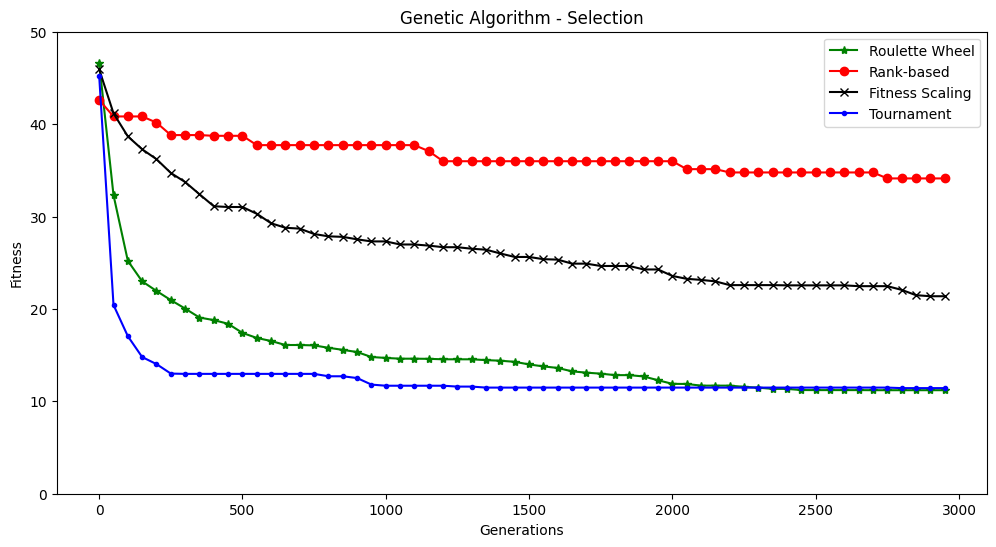

In [ ]:
roulette_wheel_records = np.array(roulette_wheel_history)
rank_based_records = np.array(rank_based_history)
fitness_scaling_records = np.array(fitness_scaling_history)
tournament_records = np.array(tournament_history)

axis_x  = roulette_wheel_records[:, 0]
axis_y1 = roulette_wheel_records[:, 1]
axis_y2 = rank_based_records[:, 1]
axis_y3 = fitness_scaling_records[:, 1]
axis_y4 = tournament_records[:, 1]

plt.figure(figsize=(12, 6))
plt.title('Genetic Algorithm - Selection')
plt.xlabel('Generations')
plt.ylabel('Fitness')
plt.plot(axis_x, axis_y1, label='Roulette Wheel', color='green', marker='*')
plt.plot(axis_x, axis_y2, label='Rank-based', color='red', marker='o')
plt.plot(axis_x, axis_y3, label='Fitness Scaling', color='black', marker='x')
plt.plot(axis_x, axis_y4, label='Tournament', color='blue', marker='.')
plt.ylim(0, 50)

plt.legend()
plt.show()


Plotting Roulette Wheel Selection

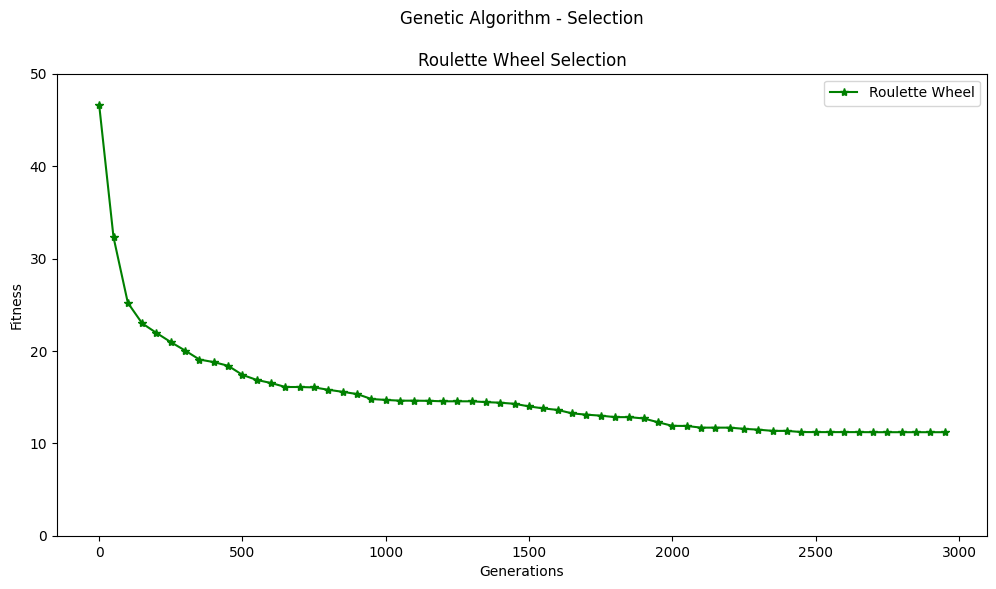

In [ ]:
roulette_wheel_records = np.array(roulette_wheel_history)

axis_x = roulette_wheel_records[:, 0]
axis_y = roulette_wheel_records[:, 1]

plt.figure(figsize=(12, 6))
plt.title('Genetic Algorithm - Selection\n\nRoulette Wheel Selection')
plt.xlabel('Generations')
plt.ylabel('Fitness')
plt.plot(axis_x, axis_y, label='Roulette Wheel', color='green', marker='*')
plt.ylim(0, 50)

plt.legend()
plt.show()


Plotting Rank-based Selection

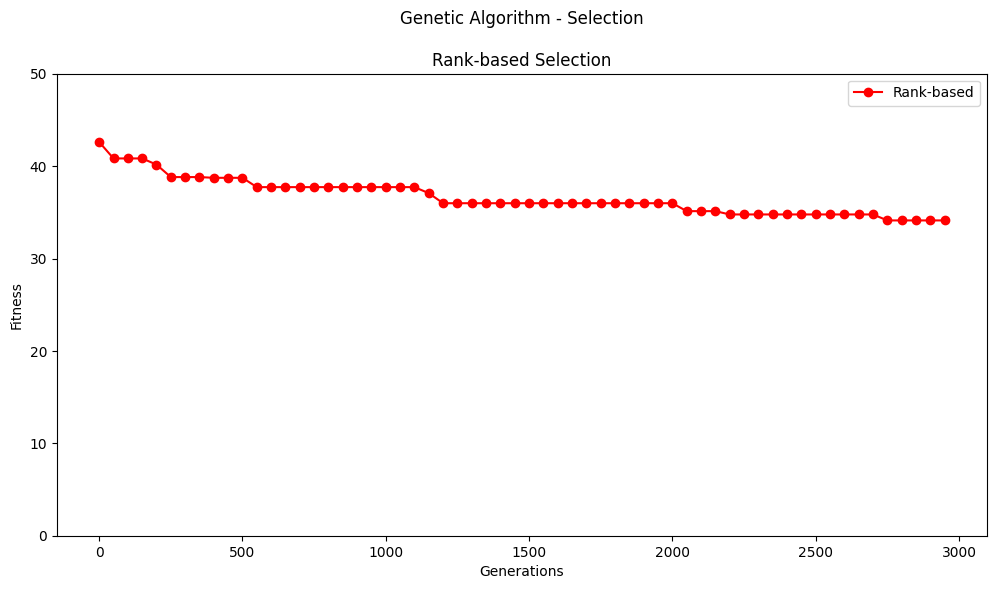

In [ ]:
rank_based_records = np.array(rank_based_history)

axis_x = rank_based_records[:, 0]
axis_y = rank_based_records[:, 1]

plt.figure(figsize=(12, 6))
plt.title('Genetic Algorithm - Selection\n\nRank-based Selection')
plt.xlabel('Generations')
plt.ylabel('Fitness')
plt.plot(axis_x, axis_y, label='Rank-based', color='red', marker='o')
plt.ylim(0, 50)

plt.legend()
plt.show()


Plotting Fitness Scaling Selection

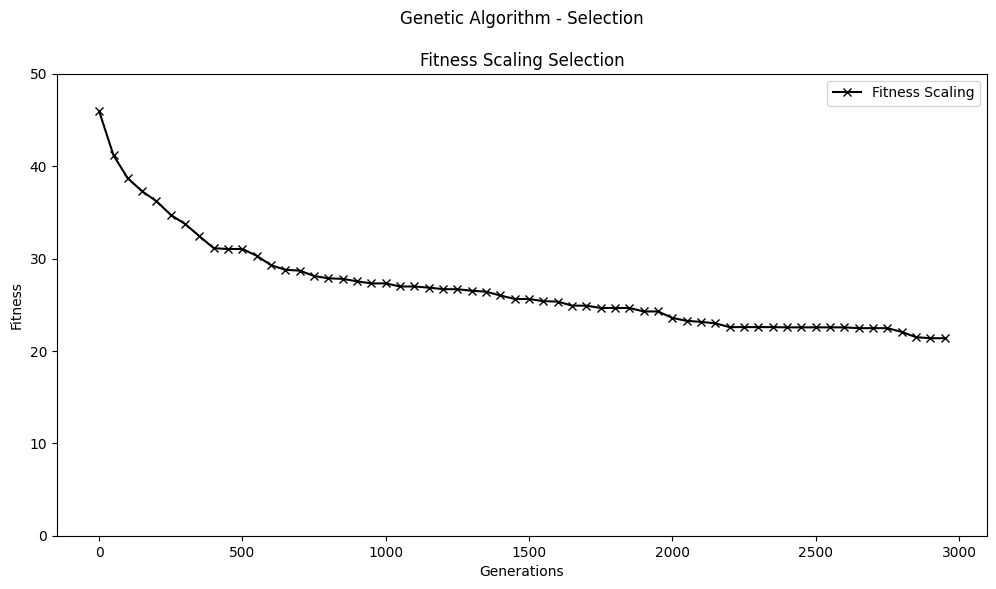

In [ ]:
fitness_scaling_records = np.array(fitness_scaling_history)

axis_x = fitness_scaling_records[:, 0]
axis_y = fitness_scaling_records[:, 1]

plt.figure(figsize=(12, 6))
plt.title('Genetic Algorithm - Selection\n\nFitness Scaling Selection')
plt.xlabel('Generations')
plt.ylabel('Fitness')
plt.plot(axis_x, axis_y, label='Fitness Scaling', color='black', marker='x')
plt.ylim(0, 50)

plt.legend()
plt.show()


Plotting Tournament Selection

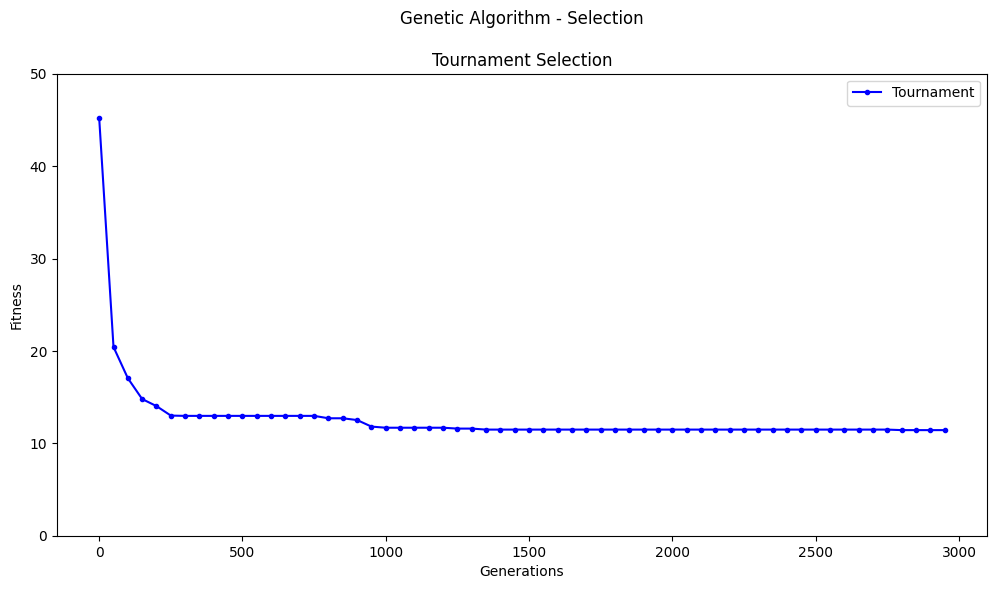

In [ ]:
tournament_records = np.array(tournament_history)

axis_x = tournament_records[:, 0]
axis_y = tournament_records[:, 1]

plt.figure(figsize=(12, 6))
plt.title('Genetic Algorithm - Selection\n\nTournament Selection')
plt.xlabel('Generations')
plt.ylabel('Fitness')
plt.plot(axis_x, axis_y, label='Tournament', color='blue', marker='.')
plt.ylim(0, 50)

plt.legend()
plt.show()
